In [13]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

%matplotlib inline


In [14]:
# Sample 1 million data points from a normal distribution
def sample_data(size):
    x1 = np.random.normal(3,2,size=size)
    x2 = np.random.normal(-1,2,size=size)
    theta=np.array([[3,1,2]]).T
    X=np.c_[np.ones(size),x1,x2]
    epsilon=np.random.normal(0,2**0.5,size=size)
    epsilon=np.c_[epsilon]
    Y=np.dot(X,theta)+epsilon
    
    # Y=np.dot(X,theta)
    return X,Y
X,Y=sample_data(1000000)


In [15]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


# Implement stochastic gradient descent
def sgd(theta,X,Y,alpha,max_iter,r,epsilon):
    m=len(Y)
    X,Y=unison_shuffled_copies(X,Y)
    batches=m//r
    converged=False
    iter=0
    # while not converged:
    #     ans+=1
    cost_last=-1
    costvector=[]
    while not converged:
        iter+=1
        print("Current iteration: ",iter,cost_last)
        for b in range(batches):
            X_b=X[b*r:(b+1)*r]
            # print(X_b)
            Y_b=Y[b*r:(b+1)*r]
            H = np.dot(X_b,theta)
            loss=np.dot((H-Y_b).T,(H-Y_b))
            # print(X_b.T.shape,H.shape,Y_b.shape,(H-Y_b).shape)
            grad=np.dot(X_b.T,(H-Y_b))/(2*m)
            theta=theta-alpha*grad
            if(b!=batches-1):
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:b*r].T,(np.dot(X[(b-1)*r:b*r],theta)-Y[(b-1)*r:b*r]))
            else:
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:].T,(np.dot(X[(b-1)*r:],theta)-Y[(b-1)*r:]))
            cost=loss/(2*r)
            cost=cost[0,0]
            costvector.append(cost)
            if abs(cost_last-cost)<epsilon:
                converged=True
                break
            cost_last=cost
        if iter>max_iter:
            converged=True
    plt.plot(costvector)
    return theta,iter

Current iteration:  1 -1
Current iteration:  2 5.529564014802562
Current iteration:  3 5.3980741894476845
Current iteration:  4 5.272090687967979
Current iteration:  5 5.15138215409695
Current iteration:  6 5.035727759622832
Current iteration:  7 4.924916716488799
Current iteration:  8 4.818747811283612
Current iteration:  9 4.717028961111101
Current iteration:  10 4.61957678986996
Current iteration:  11 4.526216224021804
Theta:  [[0.05999322]
 [0.23806081]
 [0.06946946]]
Total Iterations:  11


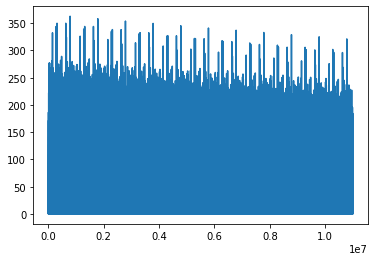

In [16]:
theta,iter=sgd([[0],[0],[0]],X,Y,alpha=0.001,max_iter=0,r=1,epsilon=1e-9)
print("Theta: ",theta)
print("Total Iterations: ",iter)

Current iteration:  1 -1
Current iteration:  2 18.98838560953396
Current iteration:  3 18.560992074021186
Current iteration:  4 18.148483825580225
Current iteration:  5 17.750256874881526
Current iteration:  6 17.3657329988675
Current iteration:  7 16.994358625468678
Current iteration:  8 16.6356037667902
Current iteration:  9 16.28896099866009
Current iteration:  10 15.953944484521909
Current iteration:  11 15.63008904174265
Current iteration:  12 15.316949248490472
Current iteration:  13 15.014098589417223
Current iteration:  14 14.721128638457492
Current iteration:  15 14.437648277129652
Current iteration:  16 14.163282946794048
Current iteration:  17 13.89767393339144
Current iteration:  18 13.640477683248541
Current iteration:  19 13.391365148599208
Current iteration:  20 13.150021161528672
Current iteration:  21 12.916143835104345
Current iteration:  22 12.689443990510684
Current iteration:  23 12.469644609056921
Current iteration:  24 12.256480307975778
Current iteration:  25 12

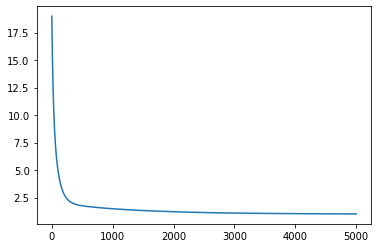

In [4]:

theta,iter=sgd([[0],[0],[0]],X,Y,alpha=0.001,max_iter=5000,r=1000000,epsilon=1e-9)
print("Theta: ",theta)
print("Total Iterations: ",iter)

Current iteration:  1 -1
Current iteration:  2 19.02745892167353
Current iteration:  3 18.608351720622306
Current iteration:  4 18.203558572403914
Current iteration:  5 17.812506954007315
Current iteration:  6 17.434648504606105
Current iteration:  7 17.069457988868344
Current iteration:  8 16.716432304975346
Current iteration:  9 16.37508953541796
Current iteration:  10 16.044968038722228
Current iteration:  11 15.725625580336413
Current iteration:  12 15.416638500987489
Current iteration:  13 15.117600920888714
Current iteration:  14 14.82812397824969
Current iteration:  15 14.547835100607061
Current iteration:  16 14.276377307558459
Current iteration:  17 14.013408543543344
Current iteration:  18 13.758601039372902
Current iteration:  19 13.511640701267549
Current iteration:  20 13.272226526214135
Current iteration:  21 13.040070042506114
Current iteration:  22 12.814894774379326
Current iteration:  23 12.596435729702979
Current iteration:  24 12.384438909730262
Current iteration:  

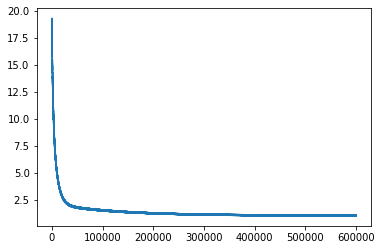

In [8]:
theta,iter=sgd([[0],[0],[0]],X,Y,alpha=0.001,max_iter=6000,r=10000,epsilon=1e-9)
print("Theta: ",theta)
print("Total Iterations: ",iter)
def get_cost(X,Y,theta):
    m=len(X)
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    cost=loss/(2*m)
    return cost[0,0]

Current iteration:  1 -1
Current iteration:  2 47.885585524899184
Current iteration:  3 46.2942474641885
Current iteration:  4 44.75846067965476
Theta:  [[0.02317588]
 [0.09248613]
 [0.0244308 ]]
Total Iterations:  4


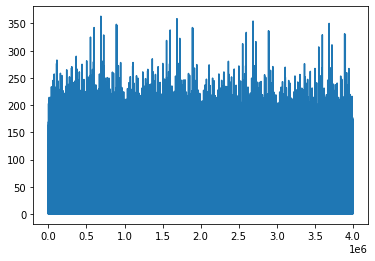

In [10]:
theta,iter=sgd([[0],[0],[0]],X,Y,alpha=0.001,max_iter=3,r=1,epsilon=1e-9)
print("Theta: ",theta)
print("Total Iterations: ",iter)

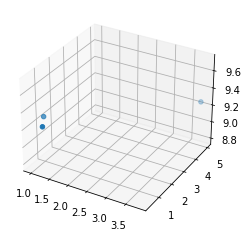

In [7]:
ax=plt.axes(projection='3d')

ax.scatter3D(X[:10000][1],X[:10000][2],Y[:10000][0])
plt.show()


NameError: name 'x1' is not defined

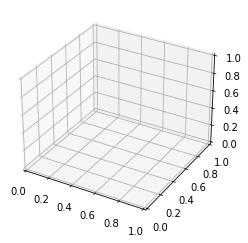

In [8]:
ax=plt.axes(projection='3d')
ax.scatter3D(x1[0:1000],x2[0:1000],Y[0:1000])

In [ ]:
a=np.ones(10)
a=np.asmatrix(a)
print(a.T)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
print(X)
np.random.shuffle(X)
print(X)



[[ 1.          6.52810469 -0.71191286]
 [ 1.          3.821197   -2.70819148]
 [ 1.          4.95747597  0.52207545]
 [ 1.          7.4817864  -0.75664997]
 [ 1.          1.04544424 -0.33265135]
 [ 1.          4.90017684  1.98815815]
 [ 1.          2.69728558 -1.41031653]
 [ 1.          3.80031442  1.90854701]
 [ 1.          2.7935623  -0.3738646 ]
 [ 1.          6.73511598 -0.11227353]]
[[ 1.          3.80031442  1.90854701]
 [ 1.          2.7935623  -0.3738646 ]
 [ 1.          6.73511598 -0.11227353]
 [ 1.          3.821197   -2.70819148]
 [ 1.          1.04544424 -0.33265135]
 [ 1.          4.90017684  1.98815815]
 [ 1.          7.4817864  -0.75664997]
 [ 1.          2.69728558 -1.41031653]
 [ 1.          6.52810469 -0.71191286]
 [ 1.          4.95747597  0.52207545]]


In [ ]:
# Notes
# 1. Use np.asmatrix or np.array([[10,20,30]]) or use np.c_[]
# 2. Always check dimensions